# Assen opmaken
In de oefening met de gemiddelde temperaturen van Delhi kan er een probleem optreden met de standaardweergave van de datums op de x-as. In dit hoofdstuk bekijken we hoe we assen kunnen opmaken.
## Tick marks
Tick marks duiden de onderverdeling aan van een as. Er zijn minor en major tickmarks. We kunnen ze verwijderen door een lege list mee te geven (misschien niet echt een goed idee in dit geval.)

In [ ]:
from pathlib import Path
from zipfile import ZipFile


import requests
URL = 'https://www.kaggle.com/api/v1/datasets/download/sumanthvrao/daily-climate-time-series-data'
DAILY_CLIMATE_ZIP = 'daily_climate.zip'
daily_climate_path = Path(DAILY_CLIMATE_ZIP)
if not daily_climate_path.exists():
    data = requests.get(URL)
    with open(DAILY_CLIMATE_ZIP, 'wb') as f:
        f.write(data.content)
    with open(DAILY_CLIMATE_ZIP, 'rb') as f:
        ZipFile(f).extractall()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meantemp  1462 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


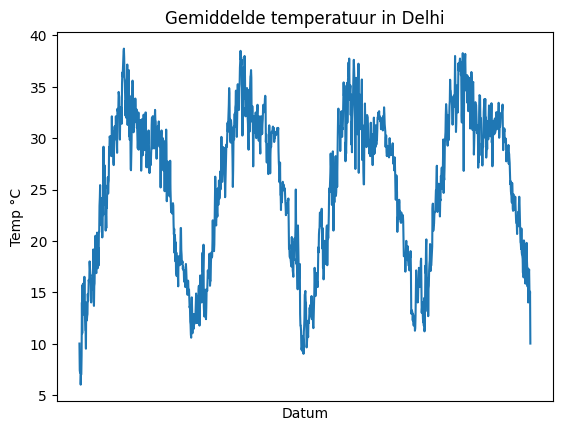

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
DAILY_CLIMATE_CSV = 'DailyDelhiClimateTrain.csv'
# We maken van date de index en we lezen alleen date en meantemp
df = pd.read_csv(DAILY_CLIMATE_CSV, usecols=['date', 'meantemp'], parse_dates=['date'], index_col='date')
df.info()
plt.plot(df.index, df['meantemp'])
plt.title('Gemiddelde temperatuur in Delhi')
plt.ylabel('Temp °C')
plt.xlabel('Datum')
plt.xticks([])
plt.show()

## set_major_locator
We kunnen de plaatsing van de ticks aanpassen met de major_locator. En hier lopen we al tegen de grenzen van de plt-aanpak. We kunnen die niet instellen zoals we dat wel met xlabel of ylabel kunnen. We moeten hiervoor een verwijzing opvragen naar de "current axes": gca() (get current axes). Daar kunnen we een verwijzing opvragen naar de x-as (xaxis) en vervolgens de locator zetten.

Een eerste mogelijkheid is de MAXNLocator. Hier stellen we in dat we maximaal 6 ticks willen zien. 

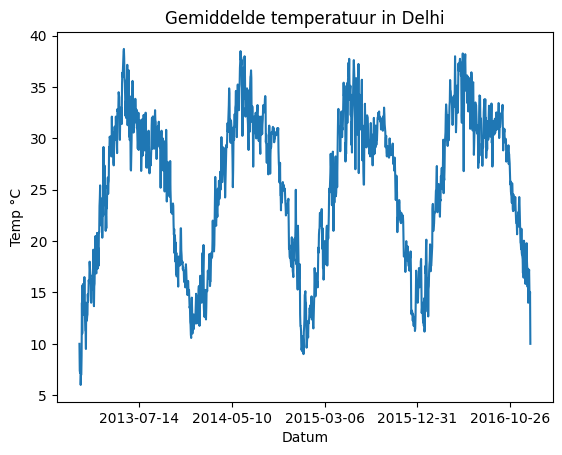

In [6]:
plt.plot(df.index, df['meantemp'])
plt.title('Gemiddelde temperatuur in Delhi')
plt.ylabel('Temp °C')
plt.xlabel('Datum')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))
plt.show()

Dit lost het probleem van het grote aantal tickmarks op, maar de keuze van de labels is niet zo handig. Omdat het datums zijn, kunnen we de YearLocator gebruiken. Standaard wordt elk jaar getoond op 1 januari

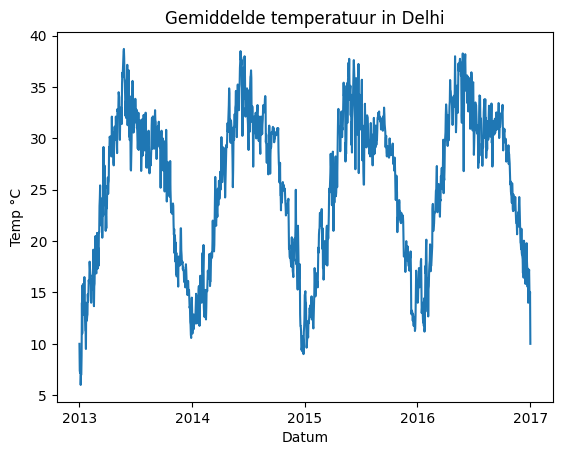

In [25]:
from matplotlib.dates import YearLocator
plt.plot(df.index, df['meantemp'])
plt.title('Gemiddelde temperatuur in Delhi')
plt.ylabel('Temp °C')
plt.xlabel('Datum')
plt.gca().xaxis.set_major_locator(YearLocator())

plt.show()

Met de DateFormatter kunnen we kiezen hoe de datums getoond moeten worden.

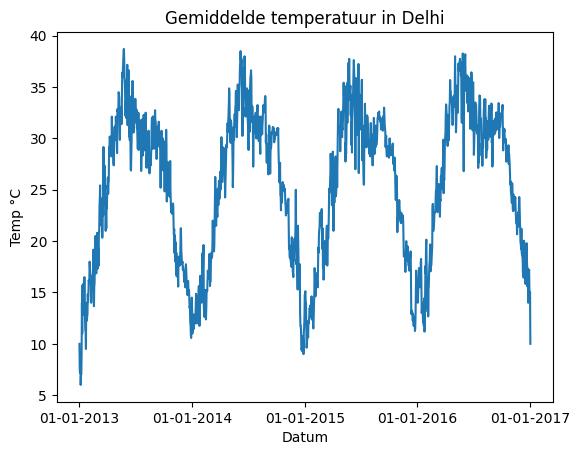

In [12]:
from matplotlib.dates import YearLocator, DateFormatter
plt.plot(df.index, df['meantemp'])
plt.title('Gemiddelde temperatuur in Delhi')
plt.ylabel('Temp °C')
plt.xlabel('Datum')
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))
plt.show()

Natuurlijk is niet alles een datum. Hoe kunnen we ingrijpen op de ticks van de y-as? In plaats van het label Temp °C, zouden we ook °C bij elke temperatuur kunnen zetten. Wanneer we alleen een formatstring meegeven, wordt de StrMethodFormatter gebruikt. Die verwacht dat er naar het veld wordt verwezen met 'x'. We kunnen natuurlijk ook extra format-informatie meegeven (bijvoorbeeld: geen cijfers na de komma)

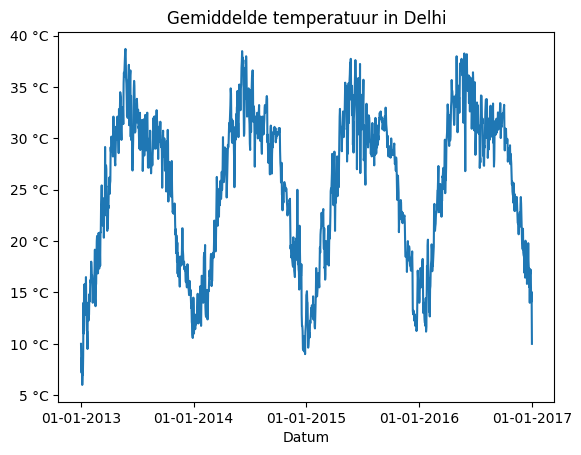

In [ ]:
from matplotlib.dates import YearLocator, DateFormatter
plt.plot(df.index, df['meantemp'])
plt.title('Gemiddelde temperatuur in Delhi')
plt.xlabel('Datum')
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))
plt.gca().yaxis.set_major_formatter(('{x} °C'))
#plt.gca().yaxis.set_major_formatter(('{x:.0f} °C'))
plt.show()

## xlim 
Op dit moment plotten we alle dagen die in het dataframe zitten. Stel dat we alleen de temperaturen van 2015 willen tonen. We beginnen met het dataframe te filteren. Nu heeft het niet veel zin meer om het jaar te tonen. We zullen daarom de MonthLocator gebruiken en bij de DateFormatter alleen de maand afdrukken. 

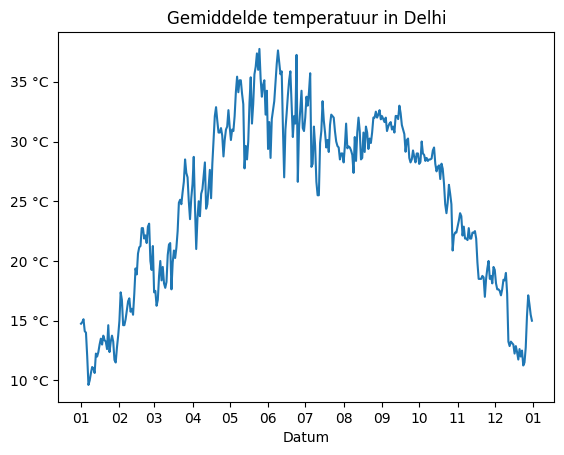

In [ ]:
from matplotlib.dates import MonthLocator, DateFormatter
startdatum = pd.to_datetime('2015-01-01')
einddatum = pd.to_datetime('2015-12-31')
y = df.loc[startdatum:einddatum]
x = df.index[(df.index >= startdatum) & (df.index <= einddatum)]
plt.plot(x, y)
plt.title('Gemiddelde temperatuur in Delhi')
plt.xlabel('Datum')
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%m'))
plt.gca().yaxis.set_major_formatter(('{x:.0f} °C'))

plt.show()

Er is nog een klein probleem: matplotlib voorziet altijd wat extra plaats aan het begin en het einde van een as. Daardoor wordt de eerste dag van 2016 ook getoond ('01').

We kunnen de grenswaarden van een as aanpassen met xlim (set_xlim). We moeten hier een extra actie ondernemen om de datums te gebruiken. Standaard verwacht matplotlib een float. Om onze datums om tre zetten naar de correcte floatwaarden, gebruiken we date2num

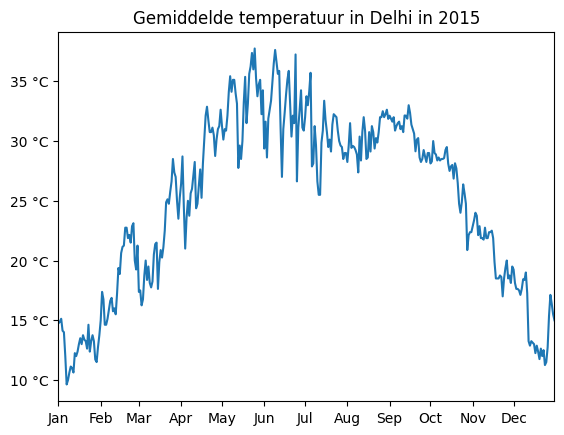

In [29]:
from matplotlib.dates import MonthLocator, DateFormatter, date2num
startdatum = pd.to_datetime('2015-01-01')
einddatum = pd.to_datetime('2015-12-31')
y = df.loc[startdatum:einddatum]
x = df.index[(df.index >= startdatum) & (df.index <= einddatum)]
plt.plot(x, y)
plt.title('Gemiddelde temperatuur in Delhi in 2015')

plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b'))
plt.gca().yaxis.set_major_formatter(('{x:.0f} °C'))
startdatum = date2num(startdatum)
einddatum = date2num(einddatum)
plt.gca().set_xlim(left=startdatum, right=einddatum)
plt.show()

## gridlines
Misschien dat gridlines de grafiek wat duidelijker kunnen maken

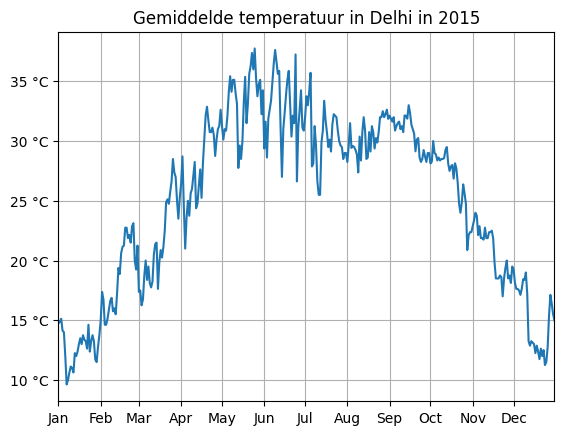

In [30]:
from matplotlib.dates import MonthLocator, DateFormatter, date2num
startdatum = pd.to_datetime('2015-01-01')
einddatum = pd.to_datetime('2015-12-31')
y = df.loc[startdatum:einddatum]
x = df.index[(df.index >= startdatum) & (df.index <= einddatum)]
plt.plot(x, y)
plt.title('Gemiddelde temperatuur in Delhi in 2015')

plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b'))
plt.gca().yaxis.set_major_formatter(('{x:.0f} °C'))
startdatum = date2num(startdatum)
einddatum = date2num(einddatum)
plt.gca().set_xlim(left=startdatum, right=einddatum)
plt.grid()
plt.show()

Wanneer we alleen gridlines voor de x-as willen:

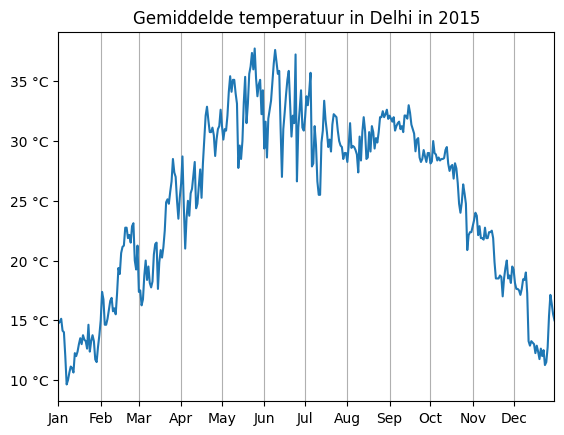

In [31]:
from matplotlib.dates import MonthLocator, DateFormatter, date2num
startdatum = pd.to_datetime('2015-01-01')
einddatum = pd.to_datetime('2015-12-31')
y = df.loc[startdatum:einddatum]
x = df.index[(df.index >= startdatum) & (df.index <= einddatum)]
plt.plot(x, y)
plt.title('Gemiddelde temperatuur in Delhi in 2015')

plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b'))
plt.gca().yaxis.set_major_formatter(('{x:.0f} °C'))
startdatum = date2num(startdatum)
einddatum = date2num(einddatum)
plt.gca().set_xlim(left=startdatum, right=einddatum)
plt.grid(axis='x')
plt.show()

We kunnen ook de stijl van de gridlines aanpassen. De kleur zwart wordt aangeduid met 'k' (zie https://www.colorvisionprinting.com/blog/why-is-the-color-black-designated-by-the-letter-k-in-cmyk)

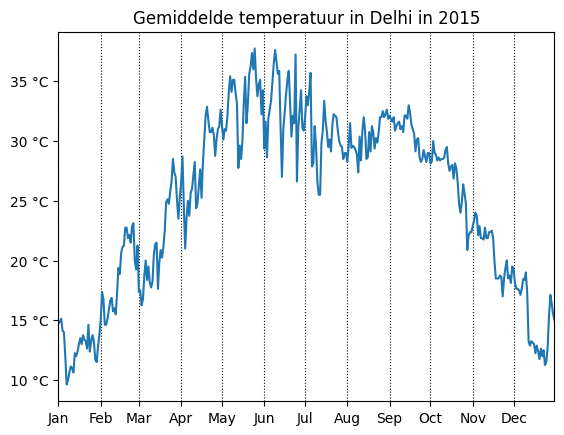

In [33]:
from matplotlib.dates import MonthLocator, DateFormatter, date2num
startdatum = pd.to_datetime('2015-01-01')
einddatum = pd.to_datetime('2015-12-31')
y = df.loc[startdatum:einddatum]
x = df.index[(df.index >= startdatum) & (df.index <= einddatum)]
plt.plot(x, y)
plt.title('Gemiddelde temperatuur in Delhi in 2015')

plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b'))
plt.gca().yaxis.set_major_formatter(('{x:.0f} °C'))
startdatum = date2num(startdatum)
einddatum = date2num(einddatum)
plt.gca().set_xlim(left=startdatum, right=einddatum)
plt.grid(axis='x', color='k', linestyle=':')
plt.show()

## De spines
De lijnen rond de grafiek noemen we 'spines'. We kunnen die apart aanspreken en bijvoorbeeld onzichtbaar maken

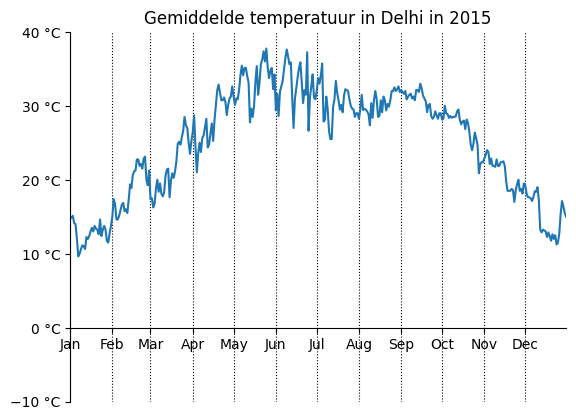

In [ ]:
from matplotlib.dates import MonthLocator, DateFormatter, date2num
startdatum = pd.to_datetime('2015-01-01')
einddatum = pd.to_datetime('2015-12-31')
y = df.loc[startdatum:einddatum]
x = df.index[(df.index >= startdatum) & (df.index <= einddatum)]
plt.plot(x, y)
plt.title('Gemiddelde temperatuur in Delhi in 2015')

plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b'))
plt.gca().yaxis.set_major_formatter(('{x:.0f} °C'))
startdatum = date2num(startdatum)
einddatum = date2num(einddatum)
plt.gca().set_xlim(left=startdatum, right=einddatum)
plt.grid(axis='x', color='k', linestyle=':')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)  
# kijk ook eens naar set_position('center')
#plt.gca().spines['bottom'].set_position('center')
# of set_position('zero'), maar dan moeten we de ondergrens van de y-as aanpassen
#plt.ylim(-10, 40)
#plt.gca().spines['bottom'].set_position('zero')
plt.show()